# Customer Churn Analysis

In [15]:
from IPython.display import Image
Image(url= "https://raw.githubusercontent.com/bhargitay/telco_customer_churn/master/img/cust_churn.png")

## Introduction

#### To predict the telecom customers who are likely to exit the contract and also to generate patterns of Churn and non-churn to assist the management to take appropriate decisions to limit churn.

#### Most telecom companies suffer from voluntary churn. Churn rate has strong impact on the life time value of the customer because it affects the length of service and the future revenue of the company. It is estimated that 75 percent of the 17 to 20 million subscribers signing up with a new wireless carrier every year are coming from another wireless provider, which means they are churners.

#### Attribute Information: The dataset depicts the details of the telecom customer, like, services that each customer has signed for, customer account information , and their demographic info etc.

## Details about the dataset:
It consists of 7043 observations and 21 variables. Independent variables contain information about customers. Dependent variable refers to customer abandonment status.

#### ***The aim is to automate the process of predicting if a customer would churn or not and to find the factors affecting the churn. The collected data for the variables in the data frames is given below:***

***1.CustomerID: The unique ID of each customer.***
    
***2.Gender: The gender of a person.***
    
***3.SeniorCitizen: Whether a customer can be classified as a senior citizen.***
    
***4.Partner: If a customer is married/ in a live-in relationship.***
    
***5.Dependents: If a customer has dependents (children/ retired parents).***
    
***6.Tenure: The time for which a customer has been using the service.***
    
***7.PhoneService: Whether a customer has a landline phone service along with the internet service.***
    
***8.MultipleLines: Whether a customer has multiple lines of internet connectivity.***
    
***9.InternetService: The type of internet services chosen by the customer.***
    
***10.OnlineSecurity: Specifies if a customer has online security.***
    
***11.OnlineBackup: Specifies if a customer has online backup.***
    
***12.DeviceProtection: Specifies if a customer has opted for device protection.***
    
***13.TechSupport: Whether a customer has opted for tech support of not.***
    
***14.StreamingTV: Whether a customer has an option of TV streaming.***
    
***15.StreamingMovies: Whether a customer has an option of Movie streaming.***
    
***16.Contract: The type of contract a customer has chosen.***
    
***17.PaperlessBilling: Whether a customer has opted for paperless billing.***
    
***18.PaymentMethod: Specifies the method by which bills are paid.***
    
***19.MonthlyCharges: Specifies the money paid by a customer each month.***
    
***20.TotalCharges: The total money paid by the customer to the company.***
    
***21.Churn: This is the target variable which specifies if a customer has churned or not.***

#### Below I am importing all the important Libraries in one go so that I can use these libraries to make good Model Prediction.

In [18]:
!pip install xgboost

In [31]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb


# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn import metrics

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# preprocessing and normalizing
from sklearn.preprocessing import LabelEncoder

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


### Loading csv data

#### Now I am going to upload or read the files/data-sets using pandas. For this I used read_csv method.

In [32]:
df = pd.read_csv('Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Then I get the top 5 values. I can get using the head function.

In [33]:
df.shape

(7043, 21)

In [34]:
# lets find out is there any null value in any columns

pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Well as a first observation I can see that there are no missing values in the above dataset.
#### Acoording to the shape of the dataset it contains 7043 rows & 21 columns.

In [35]:
df.drop_duplicates(inplace = True)

In [36]:
df.shape

(7043, 21)

#### From the above code I can analayze there is no duplicates in this dataset.

In [37]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#### ** By finding (df.unique()) it distinguish the difference between continious & categorical columns in this dataset.*

In [38]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Above statatics data show that there are no outliers in this dataset. There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.

#### Also, number of rows in each column are not same, means there are null values in the data set.

#### Also, the mean and 50%value of most of the column are not same and the STD and mean have a major differnce to each other.

#### Most of the columns of min value are near to 0 values.

# EDA - Exploratory Data Analysis

#### Now let me analyse the data using single variable using Count Plot & Pie Plot

### Data Visualization

**gender**

In [422]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

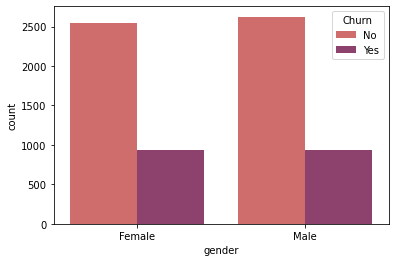

In [423]:
sns.countplot(df['gender'],palette = 'flare',hue='Churn', data = df)

#### According to the Count Plot of "gender" column i can see "Male" customers are churned out highly.   
#### "Female" customers are less churned.

<AxesSubplot:ylabel='gender'>

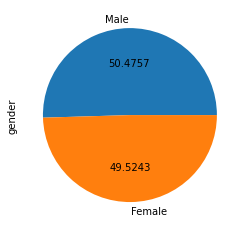

In [424]:
df['gender'].value_counts().plot(kind="pie",autopct = '%.4f')

#### As I can see, from our data of around 7043 entries, about 50.47%('Male') of the customers have churned out. 
#### The other 40.52%('Female') have stayed with the company.

**SeniorCitizen**

In [425]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

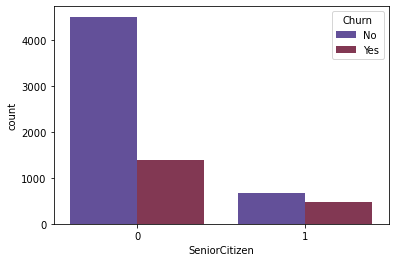

In [426]:
sns.countplot(df['SeniorCitizen'],palette = 'twilight',hue='Churn', data=df)

#### From the above count plot i can analyze that "0" signifies 5901 person and "1" says 1142 person in these dataset.

#### * So in short I can say that it doesn’t matter whether the customer is SeniorCitizen or not.

<AxesSubplot:ylabel='SeniorCitizen'>

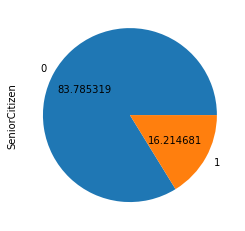

In [427]:
df['SeniorCitizen'].value_counts().plot(kind="pie",autopct = '%5f')

#### As I can see, from our data of around 7043 entries, about 83.78%('0') of the SeniorCitizen customers have churned out.
#### The other 16.21%('1') have stayed with the company.

**Partner**

In [428]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

<AxesSubplot:xlabel='Partner', ylabel='count'>

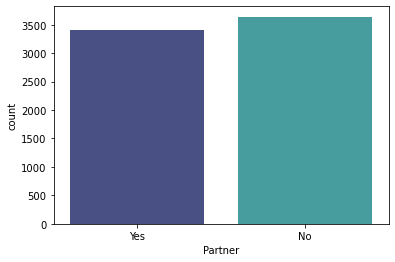

In [432]:
sns.countplot(df['Partner'],palette = 'mako',data = df)

#### From the above count plot i can analyze that "No" signifies 3641 person and "Yes" says 3402 customers in these dataset.
#### * So in short I can say that single & Un-married customers are churned out.

<AxesSubplot:ylabel='Partner'>

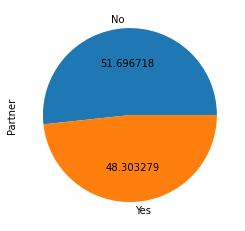

In [30]:
df['Partner'].value_counts().plot(kind="pie",autopct = '%5f')

#### No partner relationship customers with 51.69% churn ratio are disappointed with the service of the company.

**Dependents**

In [32]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

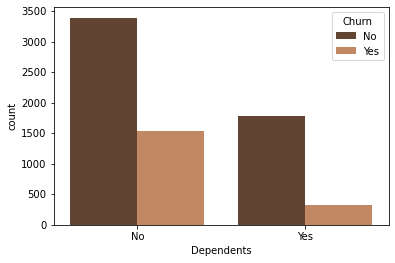

In [57]:
sns.countplot(df['Dependents'],palette = 'copper',hue='Churn', data = df)

#### Out of the above count plot i can say there are less dependents customers in this dataset.
#### Maainly of them are Single & Un-married.

<AxesSubplot:ylabel='Dependents'>

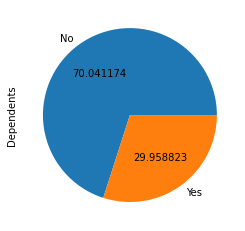

In [35]:
df['Dependents'].value_counts().plot(kind="pie",autopct = '%5f')

#### 'No'Dependents customer with 70.04% is churning the company rather than 'Yes' Dependents having 29.95% are staying with the service provide to them.

**PhoneService**

In [36]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

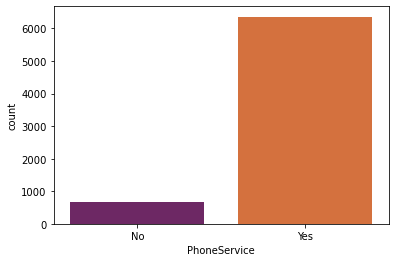

In [37]:
sns.countplot(df['PhoneService'],palette = 'inferno', data = df)

#### 'Yes'(6361) signifies Most of the customers has a landline phone service along with the internet service.
#### 'No'(682) tells those customer doesn"t use Phone Service.

<AxesSubplot:ylabel='PhoneService'>

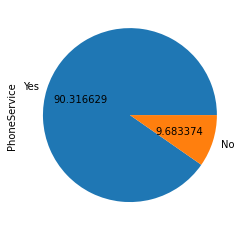

In [38]:
df['PhoneService'].value_counts().plot(kind = "pie", autopct = '%5f')

#### From the above pie plot speaks 'Yes' with 90.31% customers uses Phone Service and the rest 9.68% dosen't use services.

**MultipleLines**

In [39]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

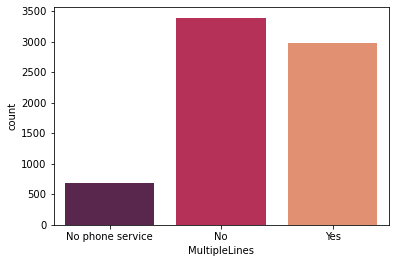

In [40]:
sns.countplot(df['MultipleLines'],palette = 'rocket', data = df)

#### 'No' tells 3390 customers have one line of internet connectivity,
#### 'Yes' shows 2971 customers have more than one internet connectivity and 'No Phone Service' speaks these customers are not interested in any internet service.

<AxesSubplot:ylabel='MultipleLines'>

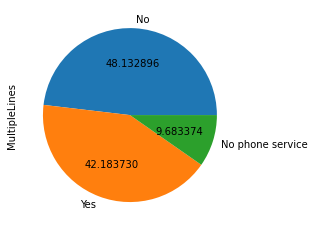

In [41]:
df['MultipleLines'].value_counts().plot(kind = "pie", autopct = '%5f')

#### From the above pie plot i can see 49.13% customers use one conectivity of internet service.

**InternetService**

In [43]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

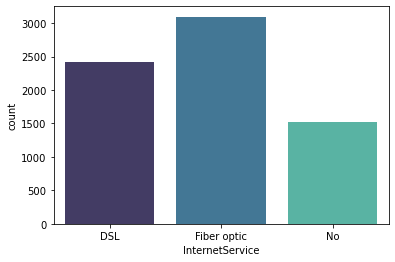

In [53]:
sns.countplot(df['InternetService'],palette='mako',data=df)

#### 3096 of the customers uses Fiber optic Internet service to get smooth consumption of internet.
#### 2421 customers consumes DSL internet service and 1526  uses internt of another conectivity.


<AxesSubplot:ylabel='InternetService'>

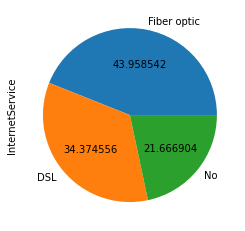

In [54]:
df['InternetService'].value_counts().plot(kind = "pie", autopct = '%5f')

#### Fiber optic with 43.95% are been used by wide range of customers to obtain smooth internet service

**OnlineSecurity**

In [59]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

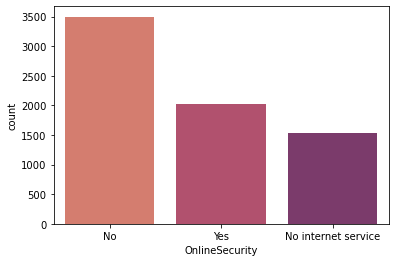

In [61]:
sns.countplot(df['OnlineSecurity'],palette='flare',data=df)

#### From the above plot i can say 3498 customers uses internet without security and through which this causes several cyber attacks to the internet users.
#### 'Yes' shows 2019 customers are very much conscious about the security.
#### 'No internet service tells' 1526 customers  are inactive in using internet service.

<AxesSubplot:ylabel='OnlineSecurity'>

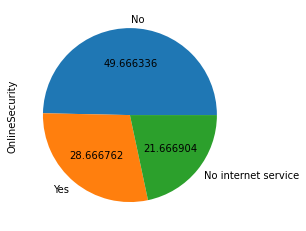

In [62]:
df['OnlineSecurity'].value_counts().plot(kind = "pie", autopct = '%5f')

**OnlineBackup**

In [63]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

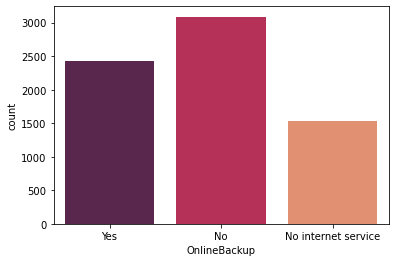

In [70]:
sns.countplot(df['OnlineBackup'],palette='rocket',data=df)

#### 3088 customers has No online backup.
#### 2429 customers have online backup for having all time internet connectivity.
#### While 1526 customer dosen't have internet connection so they are free from online backup. 

<AxesSubplot:ylabel='OnlineBackup'>

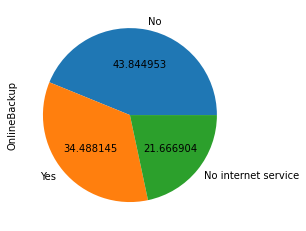

In [65]:
df['OnlineBackup'].value_counts().plot(kind = "pie", autopct = '%5f')

#### According to the pie pot I can visualize 43.84% customer dosen't have online backup which causes them problem in using internet for fututre purpose..

**DeviceProtection**

In [66]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

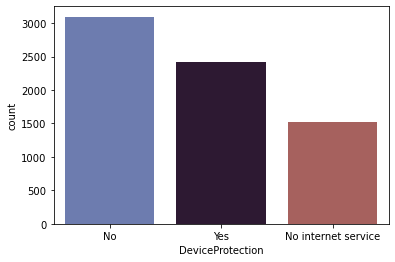

In [71]:
sns.countplot(df['DeviceProtection'],palette='twilight',data=df)

#### Protection is a secret of been safe & secure for using internet service, but according to this count plot I can see 3095 customers has not opted device protection seurity.
#### 2422 customers have opted device protection which shows they are vey much safe of using internet service.
#### At the end 1526 customers are having no internet service.

<AxesSubplot:ylabel='DeviceProtection'>

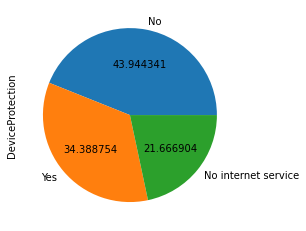

In [68]:
df['DeviceProtection'].value_counts().plot(kind = "pie", autopct = '%5f')

#### By the help of pie plot i can see 43.94% customers has no device protection which specify they are carelessly using internet service without any fear of cyber attacks.
#### Along with this 34.38% customers are conscious about there device protection and 21.66% customers have no role in internet service.

**TechSupport**

In [69]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

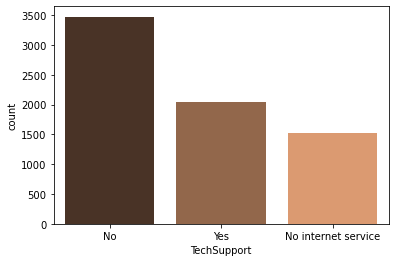

In [72]:
sns.countplot(df['TechSupport'],palette='copper',data=df)

#### 3473 customers has not opted for tech support by which it shows how much they are careless about Internet service.
#### 2044 customer has recieved tech support which says they got the backup from the company and 1526 never taken internet connnection so they are unable to opt techsupport. .

<AxesSubplot:ylabel='TechSupport'>

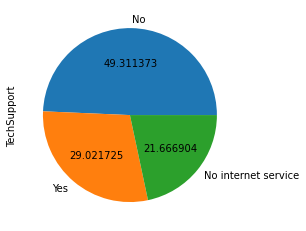

In [73]:
df['TechSupport'].value_counts().plot(kind = "pie", autopct = '%5f')

#### Technical support is the main srevice support which sholud be given by the internet provider.
#### According to this pie plot 29.02% customers have gain the benefit of technical support and 49.31% customers have not got the tech support which shows they were not interested in using this internet connectivity.
#### Although remaining 21.66% has never required to face tech support because they have not opted internet service.

**StreamingTV**

In [74]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

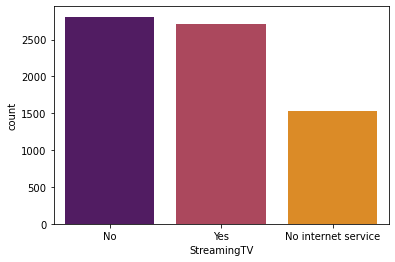

In [76]:
sns.countplot(df['StreamingTV'],palette='inferno',data=df)

#### 2707 customers has an option of TV streaming in internet service.
#### 2810 customers deny to choose the option of Streaming TV and 1526 customers has neither taken internet service so it is unable for them to take this option.

<AxesSubplot:ylabel='StreamingTV'>

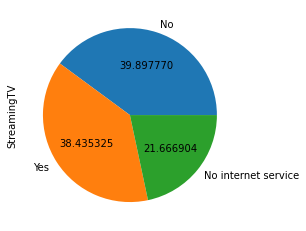

In [77]:
df['StreamingTV'].value_counts().plot(kind = "pie", autopct = '%5f')

#### After choosing internet service 38.43% has taken streaming TV option with internet connectivity..
#### While 39.89% have not not taken TV option in there subjective internet package and 21.66% has no internet connection.

**StreamingMovies**

In [4]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

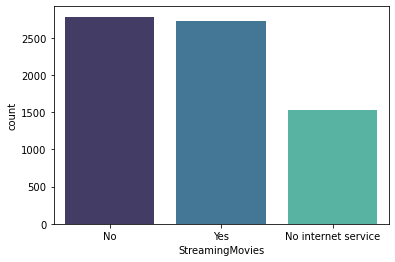

In [5]:
sns.countplot(df['StreamingMovies'],palette='mako',data=df)

#### 2732 customers has an option of StreamingMovies in internet service.
#### 2785 customers deny to choose the option of StreamingMovies and 1526 customers has neither taken internet service so it is unable for them to take this option.

<AxesSubplot:ylabel='StreamingMovies'>

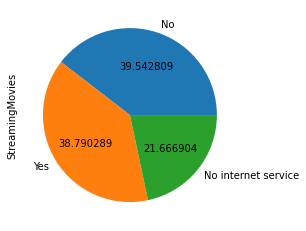

In [6]:
df['StreamingMovies'].value_counts().plot(kind = "pie", autopct = '%5f')

#### After choosing internet service 38.79% has taken StreamingMovies option with internet connectivity..
#### While 39.54% have not not taken StreamingMovies option in there subjective internet package and 21.66% has no internet connection.

**Contract**

In [82]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

<AxesSubplot:xlabel='Contract', ylabel='count'>

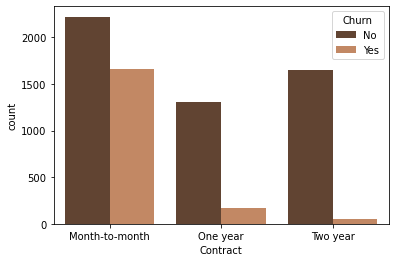

In [85]:
sns.countplot(df['Contract'],palette='copper',hue='Churn',data=df)

#### Contact of a internet connection binds customers not to switch to another innernet connectivity company.
#### So by this count plot I can see 3875 customers uses Monthly subscription plan, 1695 customers uses Two-year contract for internet connection and 1473 customers uses one year contract in this company.

<AxesSubplot:ylabel='Contract'>

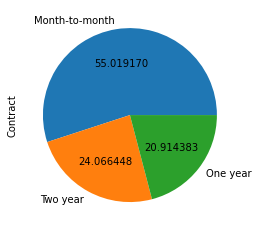

In [86]:
df['Contract'].value_counts().plot(kind = "pie", autopct = '%5f')

#### According to these pie plot i can see 55.01% customers has taken monthly contract of internet service.
#### And else 24.06% customers have taken two-year contract while 20.91% has recieved one-year contract of internet connectivity.

**PaperlessBilling**

In [87]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

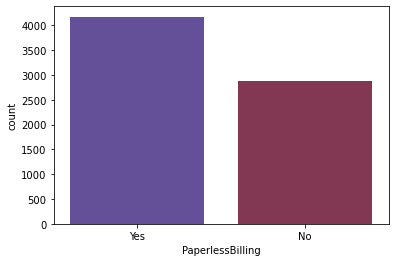

In [96]:
sns.countplot(df['PaperlessBilling'],palette='twilight',data=df)

#### After taking subscription of internet service every customer should recieve payment reciept through billing method. 

#### As this plot shows 4171 customers has opted internet service billing reciept.
#### While, 2872 customers has not taken the reciept bill.

<AxesSubplot:ylabel='PaperlessBilling'>

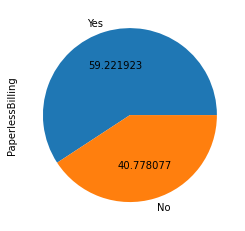

In [90]:
df['PaperlessBilling'].value_counts().plot(kind = "pie", autopct = '%5f')

#### Custmoers taking paperbilling receipt has 59.22% and those not taking has 40.77% ratio.

**PaymentMethod**

In [91]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

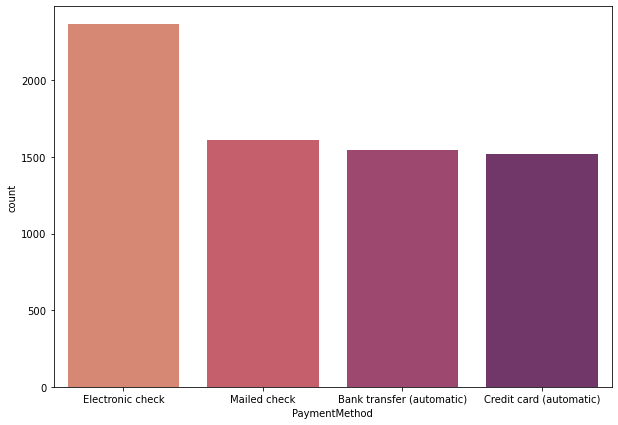

In [17]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(df['PaymentMethod'],palette='flare',data=df)

#### Electronic check customers(2365) are the highest paying customers of internet service and it is paid digitally.
#### Then comes Mailed Check customers (1612) are the second highest paynig customers of Internet connection.
#### Payment method through Bank transfer (automatic) are  (1544) customers.
#### And at last credit card paymnet method with (1522) customers.

<AxesSubplot:ylabel='PaymentMethod'>

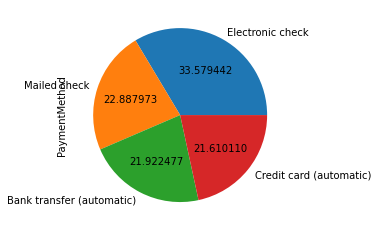

In [100]:
df['PaymentMethod'].value_counts().plot(kind = "pie", autopct = '%4f')

#### As I can see through Pie plot that Electronic check payment method is widely used with 33.57% and rest are using Mailed check,Bank transfer (automatic),Credit card (automatic) with 22.88%,21.92%, & 21.61% for bill payments.

**Churn**

In [27]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

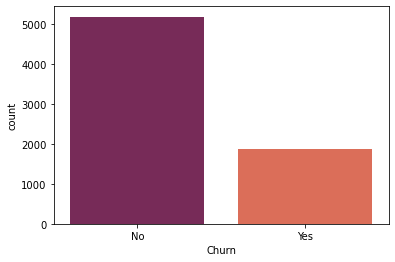

In [28]:
sns.countplot(df['Churn'],palette='rocket',data=df)

#### 5174 customers has stayed in the comapny while 1869 customers had leaved the company.

<AxesSubplot:ylabel='Churn'>

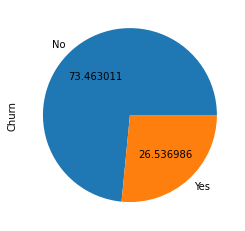

In [99]:
df['Churn'].value_counts().plot(kind = "pie", autopct = '%5f')

#### 73.46% of custoers are staying and the rest 26.53% customers are leaving the company.

In [39]:
# dropping the unwanted columns 
df.drop('customerID',inplace=True,axis=1)
df.drop('TotalCharges',inplace=True,axis=1)

In [40]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [41]:
df.shape

(7043, 19)

#### From the above coding I have dropped the Un-Wanted columns and use head() & shape code to get the summary of dataset after Data Visualization.   

## Label Encoder

In [42]:
le = LabelEncoder()
df.gender = le.fit_transform(df.gender)
df.Partner = le.fit_transform(df.Partner)
df.Dependents = le.fit_transform(df.Dependents)
df.PhoneService = le.fit_transform(df.PhoneService)
df.MultipleLines = le.fit_transform(df.MultipleLines)
df.InternetService = le.fit_transform(df.InternetService)
df.OnlineSecurity = le.fit_transform(df.OnlineSecurity)
df.OnlineBackup = le.fit_transform(df.OnlineBackup)
df.DeviceProtection = le.fit_transform(df.DeviceProtection)
df.TechSupport = le.fit_transform(df.TechSupport)
df.StreamingTV = le.fit_transform(df.StreamingTV)
df.StreamingMovies = le.fit_transform(df.StreamingMovies)
df.Contract = le.fit_transform(df.Contract)
df.PaperlessBilling = le.fit_transform(df.PaperlessBilling)
df.PaymentMethod = le.fit_transform(df.PaymentMethod)
df.Churn = le.fit_transform(df.Churn)

In [43]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [44]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


#### After Applying Label Encoder i have converted all the strings columns into integer.

#### From the describe code i can say that there are few zero values in this dataset which i will replace soon.

## Distribution Plot

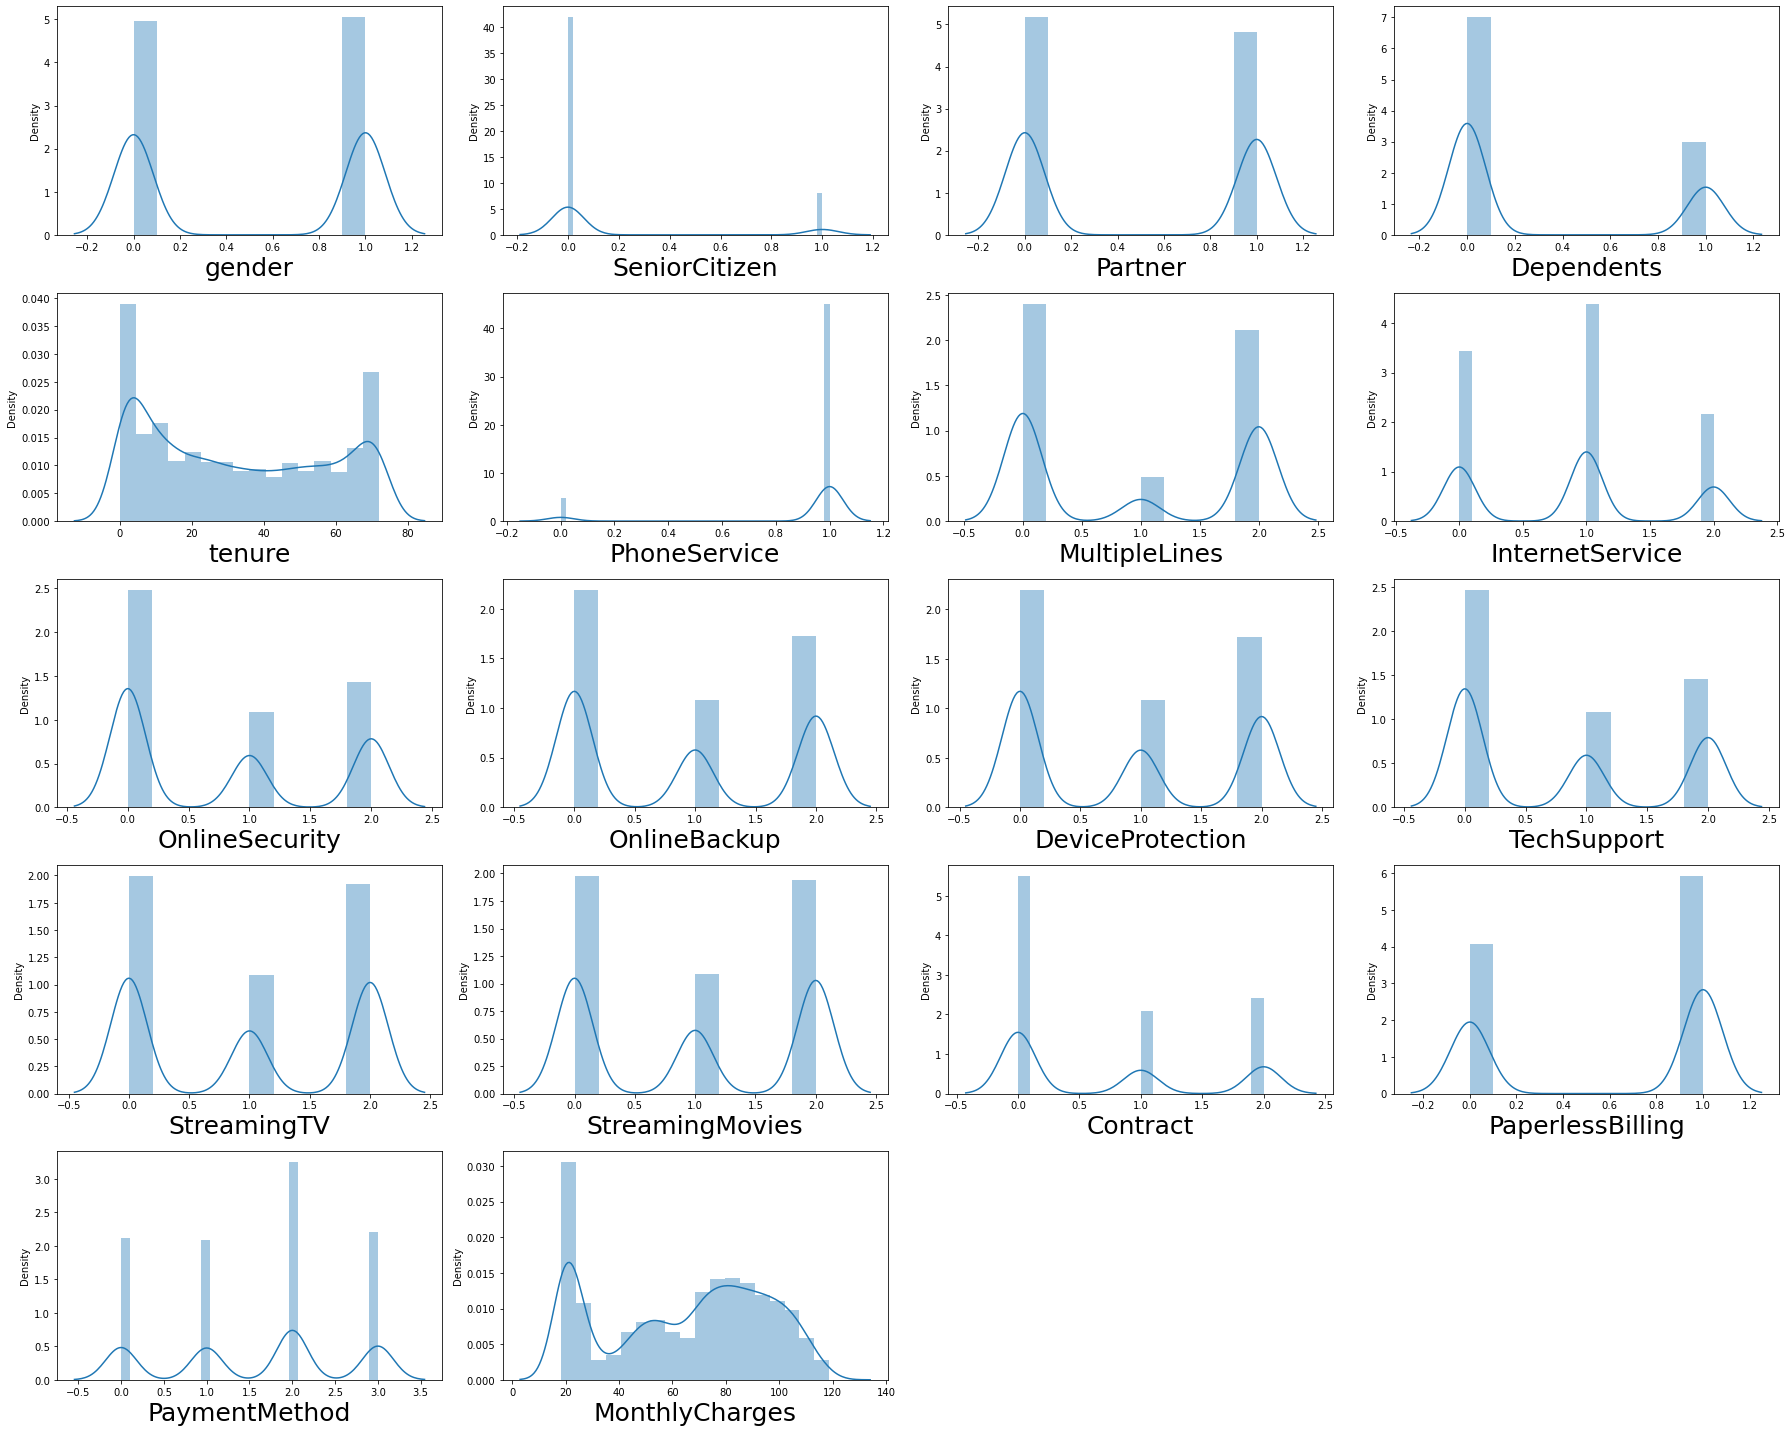

In [45]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

#### After replacing categorical columns to numerical values I use Distribution Plot to find the Skewness in this Dataset.

### Replacing  zero value from tenure column

In [46]:
# Replacing continous columns with mean
df['tenure'] = df['tenure'].replace(0,df['tenure'].mean())

#### According to the Dataset (tenure) column have zero values and also of continious type which i have replace it.

## Box Plot

gender                 AxesSubplot(0.125,0.749828;0.168478x0.130172)
SeniorCitizen       AxesSubplot(0.327174,0.749828;0.168478x0.130172)
Partner             AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Dependents          AxesSubplot(0.731522,0.749828;0.168478x0.130172)
tenure                 AxesSubplot(0.125,0.593621;0.168478x0.130172)
PhoneService        AxesSubplot(0.327174,0.593621;0.168478x0.130172)
MultipleLines       AxesSubplot(0.529348,0.593621;0.168478x0.130172)
InternetService     AxesSubplot(0.731522,0.593621;0.168478x0.130172)
OnlineSecurity         AxesSubplot(0.125,0.437414;0.168478x0.130172)
OnlineBackup        AxesSubplot(0.327174,0.437414;0.168478x0.130172)
DeviceProtection    AxesSubplot(0.529348,0.437414;0.168478x0.130172)
TechSupport         AxesSubplot(0.731522,0.437414;0.168478x0.130172)
StreamingTV            AxesSubplot(0.125,0.281207;0.168478x0.130172)
StreamingMovies     AxesSubplot(0.327174,0.281207;0.168478x0.130172)
Contract            AxesSubplot(0.

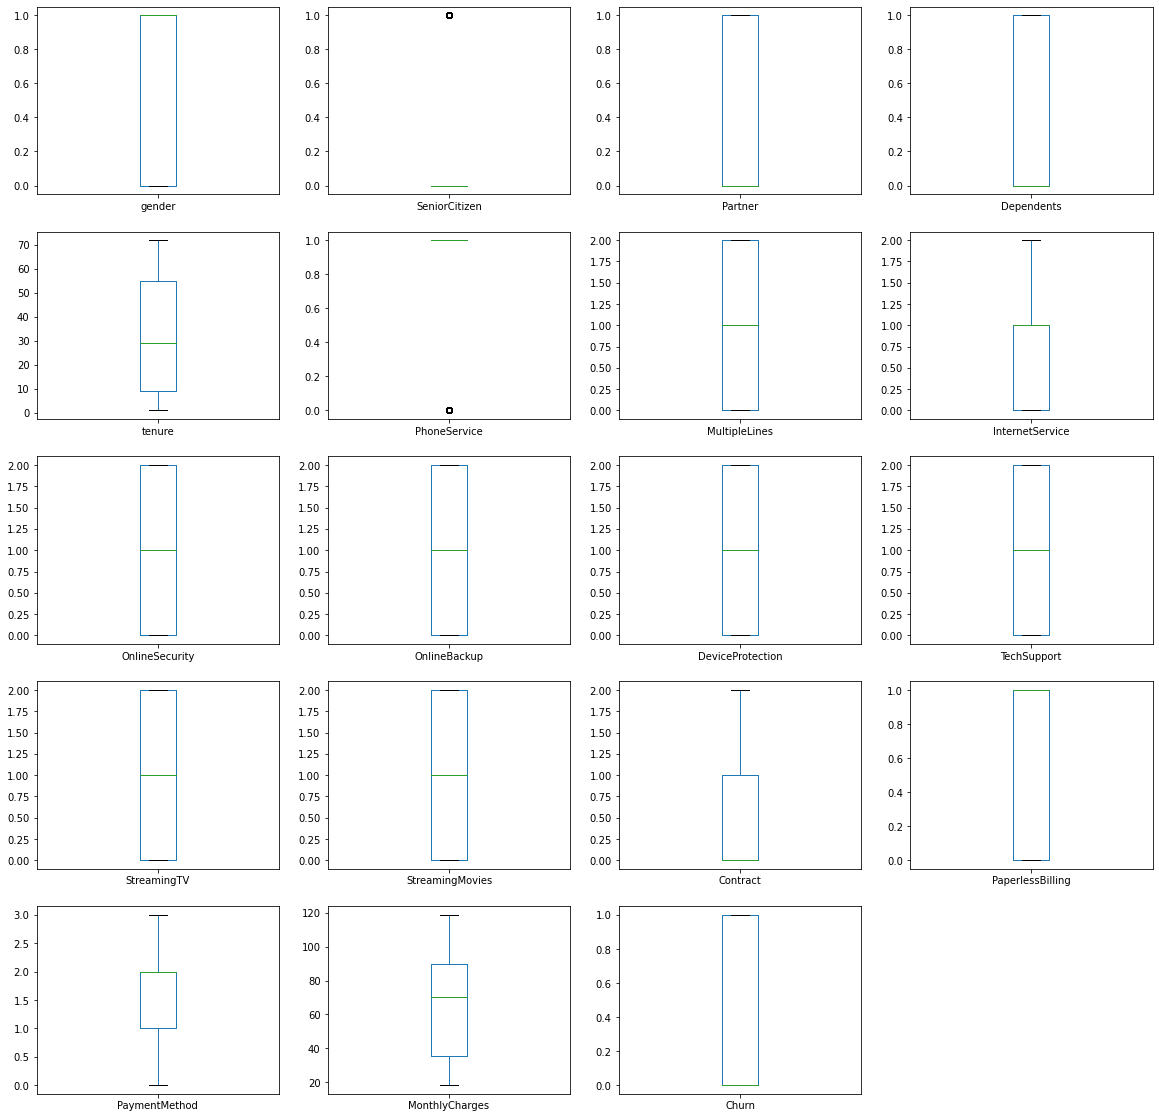

In [47]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(20,20))

#### From above image I can clear see that there are few black dots in Phone service & Senior Citizen column which are referring to less outliers.
#### But I am not use any outliers removing method because outlier ring is find in Categorical column only.

# Machine Learning

In [48]:
# dividing features and label

x = df.drop('Churn',axis=1)
y = df.Churn

#### Separate response variable and features in x & y.

### StandardScaler

#### The scikit library provides various types of scalers including MinMax Scaler and the StandardScaler.
#### Below I will use the StandardScaler to scale the data.

In [49]:
# standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.39855772, -1.16032292],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.20511329,
         1.33486261, -0.25962894],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
         1.33486261, -0.36266036],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.39855772, -1.1686319 ],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  0.8297975 ,
         1.33486261,  0.32033821],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
        -1.47405205,  1.35896134]])

#### By Using Standard Scaler I have scaled the data in scaled one.

### VIF - variance inflation factor

In [50]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.001700,gender
1,1.149735,SeniorCitizen
2,1.461472,Partner
3,1.381632,Dependents
4,2.789733,tenure
5,1.622403,PhoneService
6,1.392799,MultipleLines
7,1.825876,InternetService
8,1.247905,OnlineSecurity
9,1.186754,OnlineBackup


#### By using Variance Inflation Factor(VIF) I can see that there is a no strong relationship among any Features as values are less than 5 which shows there is no multi-collinearity.

## Model Building

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

#### Splitting the dataset into the Training set and Test set.

#### The data should be divided into train and test data.

#### *I will use train_test_split feature to divide the data and I will be using testing set of 25% and a training set of 75% of the data.

#### I can set the random state of the split to ensure consistent results.

## Applying Machine Learning Algorithms

#### Since I must predict a binary class, I will be using classification models for training & predicting Churn.
#### I need to keep in mind that my focus should be to have a better accuracy of predicting Churn i.e. Churn = 1 which in confusion matrix will be "True Positive".
#### However, I should not forget the prediction accuracy of not qualifying for Churn i.e. Churn = 0 which will be "True Negative" in confusion matrix.

#### In this section; Logistic Regression, Decision Tree Classification, Random Forest Classification, K-NN Classification,ADA Boost Classification and XGBClassifier algorithms are applied in the dataset.

#### I will apply these algorithms into all features available and I will also try to improve model accuracy via hyperparameter tuning. 

## Logistic Regression

#### As here I wan’t to classify between the customers who have stayed in the company & how many have churned out, so I have used Logistic Regression.

#### Here is the code for Logistic Regression

In [52]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [53]:
y_pred = log_reg.predict(x_test)

In [54]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1150,  136],
       [ 214,  261]], dtype=int64)

In [55]:
log_reg.score(x_test,y_test)

0.8012492901760363

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1286
           1       0.66      0.55      0.60       475

    accuracy                           0.80      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.79      0.80      0.80      1761



Text(0.5, 1.0, 'Logistic Regression')

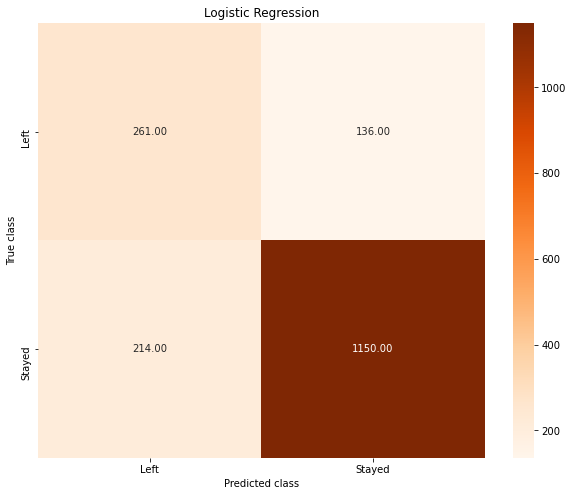

In [57]:
# Finding classification report
print(classification_report(y_test, y_pred))

# finding  confusion matrix
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = 'Oranges')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

### By using Logistic Regression I Get Accuracy Score : 80%

#### After modelling Logistic Regression then my next step is to find Auc Score which will help me to make Roc_Auc Curve.

#### Below is the Auc Score:

In [58]:
# Logistic Regression
roc_auc_score(y_test,log_reg.predict(x_test))

0.7218597036915773

#### So, I get Auc Score From Logistic Regresion is 72.18%.

## KNN

### After using Logistic Regression I use Knn Model to predict the churn.

#### Therefore my first work is to use best feature method selection method which I will use with KNN model.

### Using SelectKBest Method for best features selection

In [61]:
best_features = SelectKBest(score_func=f_classif,k=16)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

# concatenate DataFrame
feature_scores = pd.concat([df_columns,df_scores],axis = 1)
feature_scores.columns = ['Features_Name','Score']
print(feature_scores.nlargest(16,'Score'))

       Features_Name        Score
14          Contract  1315.088872
4             tenure  1008.421408
8     OnlineSecurity   643.162019
11       TechSupport   610.610024
9       OnlineBackup   279.877370
17    MonthlyCharges   273.463704
15  PaperlessBilling   268.985218
10  DeviceProtection   230.744618
3         Dependents   195.149314
1      SeniorCitizen   164.041424
2            Partner   163.060036
16     PaymentMethod    81.641664
7    InternetService    15.782320
13   StreamingMovies    10.447463
6      MultipleLines    10.201712
12       StreamingTV     9.434674


### Contract Plays a important role in Churning customers from a company.
#### Therefore, from my analysis contract is best column to predict Churn from this dataset.

### KNN model Building

In [62]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [63]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1091,  195],
       [ 244,  231]], dtype=int64)

In [64]:
knn.score(x_test,y_test)

0.750709823963657

In [65]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1286
           1       0.54      0.49      0.51       475

    accuracy                           0.75      1761
   macro avg       0.68      0.67      0.67      1761
weighted avg       0.74      0.75      0.75      1761



### According to my perception of modelling KNN I got Accuracy Score : 75%.

#### But this score can improve the accuracy by using Grid Search CV

### Let use Grid search CV for the best parameter to improve the accuracy

In [66]:
param_grid = {'algorithm':['kd_tree','brute'],
             'leaf_size':[15,18],
             'n_neighbors':[3,5,7]
             }

In [67]:
gridsearch = GridSearchCV(estimator=knn,param_grid=param_grid)

In [68]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18], 'n_neighbors': [3, 5, 7]})

In [69]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 7}

In [70]:
# we will use the best parameters in our knn algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 15, n_neighbors=7)

In [71]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15, n_neighbors=7)

In [72]:
y_pred = knn.predict(x_test)

In [73]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1098,  188],
       [ 235,  240]], dtype=int64)

In [74]:
knn.score(x_test,y_test)

0.7597955706984668

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1286
           1       0.56      0.51      0.53       475

    accuracy                           0.76      1761
   macro avg       0.69      0.68      0.69      1761
weighted avg       0.75      0.76      0.76      1761



Text(0.5, 1.0, 'KNeighborsClassifier')

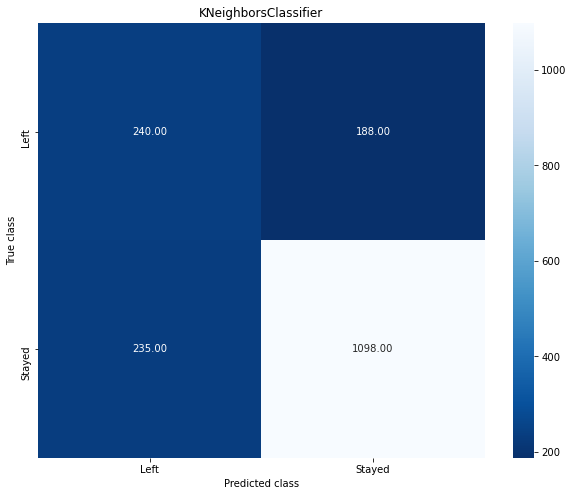

In [75]:
# Finding classification report
print(classification_report(y_test, y_pred))

# finding confusion matrix
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('KNeighborsClassifier')

### By using Grid Search CV I improve the Accuracy Score : 76%

#### After modelling KNN then my next step is to find Auc Score which will help me to make Roc_Auc Curve.

#### Below is the Auc Score:

In [76]:
# KNN 
roc_auc_score(y_test,knn.predict(x_test))

0.6795367111402145

#### So, I get Auc Score From KNN is 67.95%

## RandomForestClassifier

#### After using KNN I use RandomForestClassifier to predict the Churn.

In [92]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [93]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1145,  141],
       [ 246,  229]], dtype=int64)

In [94]:
rfc.score(x_test,y_test)

0.7802385008517888

In [95]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1286
           1       0.62      0.48      0.54       475

    accuracy                           0.78      1761
   macro avg       0.72      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761



#### According to my perception of modelling RandomForestClassifier I got Accuracy Score : 78%.

#### But this score can improve the accuracy by using Grid Search CV.

### Let use Grid search CV for the best parameter to improve the accuracy

In [96]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 15}


In [97]:
rfc = grd.best_estimator_

In [98]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=10, n_estimators=15)

In [99]:
y_pred = rfc.predict(x_test)

In [100]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1174,  112],
       [ 239,  236]], dtype=int64)

In [101]:
rfc.score(x_test,y_test)

0.8006814310051107

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1286
           1       0.68      0.50      0.57       475

    accuracy                           0.80      1761
   macro avg       0.75      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



Text(0.5, 1.0, 'RandomForestClassifier')

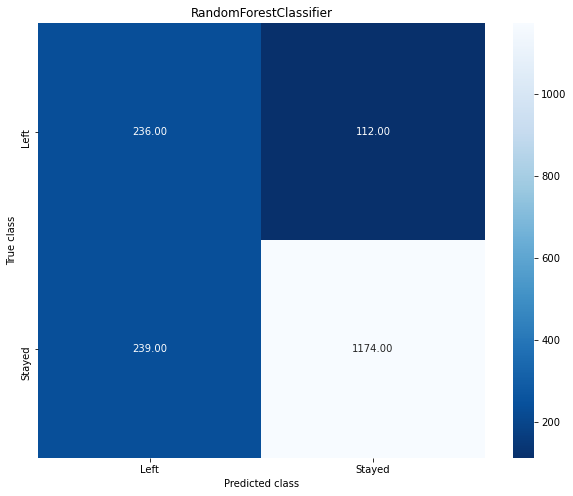

In [102]:
# Finding classification report
print(classification_report(y_test, y_pred))

# finding confusion matrix
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('RandomForestClassifier')

### By using Grid Search CV I improve the Accuracy Score : 80%

#### After modelling RandomForestClassifier then my next step is to find Auc Score which will help me to make Roc_Auc Curve.
#### Below is the Auc Score:

In [103]:
# Random forest  
roc_auc_score(y_test,rfc.predict(x_test))

0.7048751739379553

#### So, I get Auc Score From KNN is 70.48%

## Decision Tree Classifier

### After using Random Forest Classifier I use Decision Tree Classifier to predict the churn.

In [104]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

In [105]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1055,  231],
       [ 249,  226]], dtype=int64)

In [106]:
dtc.score(x_test,y_test)

0.727427597955707

In [107]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1286
           1       0.49      0.48      0.48       475

    accuracy                           0.73      1761
   macro avg       0.65      0.65      0.65      1761
weighted avg       0.72      0.73      0.73      1761



#### According to my perception of modelling Decision Tree Classifier I got Accuracy Score : 73%.

### But this score can improve the accuracy by using Grid Search CV.

### Let use Grid search CV for the best parameter to improve the accuracy

In [108]:
grid_param = {'criterion':['gini','entropy'],
             'max_depth':range(2,10,3),
             'min_samples_leaf':range(1,10,2),
             'min_samples_split':range(2,10,2)
             }

In [109]:
grid_search = GridSearchCV(estimator=dtc,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=1)

In [110]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [111]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [112]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=9,min_samples_split=2)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=9)

In [113]:
y_pred = dtc.predict(x_test)

In [114]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[993, 293],
       [139, 336]], dtype=int64)

In [115]:
dtc.score(x_test,y_test)

0.7546848381601363

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1286
           1       0.53      0.71      0.61       475

    accuracy                           0.75      1761
   macro avg       0.71      0.74      0.72      1761
weighted avg       0.78      0.75      0.76      1761



Text(0.5, 1.0, 'DecisionTreeClassifier')

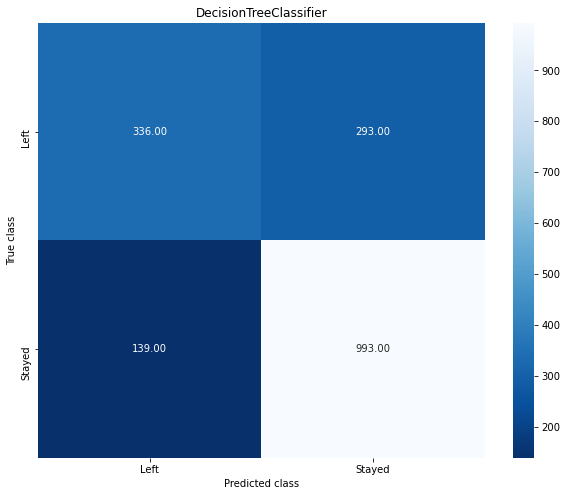

In [116]:
# Finding classification report
print(classification_report(y_test, y_pred))

# finding confusion matrix
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('DecisionTreeClassifier')

#### By using Grid Search CV I improve the Accuracy Score : 75%

#### After modelling Decision Tree Classifier then my next step is to find Auc Score which will help me to make Roc_Auc Curve.
#### Below is the Auc Score:    

In [117]:
# Decision Tree Classifier
roc_auc_score(y_test,dtc.predict(x_test))

0.7397650814438896

#### So, I get Auc Score From Decision Tree Classifier is 73.97%

## XGBoost Model

### After using Decision Tree Classifier I use XGBoost Classifier Model to predict the churn.

In [118]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

[21:54:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
# checking training accuracy

y_pred = xgb.predict(x_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy

0.919916698220371

In [120]:
# checking initial test accuracy

y_pred = xgb.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7717206132879046

In [121]:
x_test

array([[ 0.99053183, -0.43991649,  1.03453023, ...,  0.8297975 ,
         1.33486261,  0.70088972],
       [-1.00955867, -0.43991649, -0.96662231, ..., -1.20511329,
        -1.47405205, -1.50597669],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.20511329,
         0.39855772, -1.31985543],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.39855772,  0.65602121],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
         0.39855772, -0.32443902],
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         1.33486261, -1.3381352 ]])

In [122]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1286
           1       0.59      0.49      0.53       475

    accuracy                           0.77      1761
   macro avg       0.71      0.68      0.69      1761
weighted avg       0.76      0.77      0.76      1761



#### According to my perception of modelling XGBoost Classifier I got Accuracy Score : 77%.

## But this score can improve the accuracy by using Grid Search CV.

### Let use Grid search CV for the best parameter to improve the accuracy

In [123]:
param_grid = {'learning_rate':[1,0.5,0.1,0.01,0.001],
             'max_depth':[3,5,10,20],
             'n_estimators':[10,50,100,200]
             }

In [124]:
grid = GridSearchCV(XGBClassifier(),param_grid,verbose=3)

In [125]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[21:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.794 total time=   0.0s
[21:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.794 total time=   0.0s
[21:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the d

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [126]:
# to find best parameters giving maximum accuracy

grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [127]:
xgb = XGBClassifier(learning_rate='1',max_depth=3,n_estimators=10)
xgb.fit(x_train,y_train)

[21:59:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate='1', max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [128]:
y_pred = xgb.predict(x_test)

In [129]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1151,  135],
       [ 219,  256]], dtype=int64)

In [130]:
xgb.score(x_test,y_test)

0.7989778534923339

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1286
           1       0.65      0.54      0.59       475

    accuracy                           0.80      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.79      0.80      0.79      1761



Text(0.5, 1.0, 'XGBClassifier')

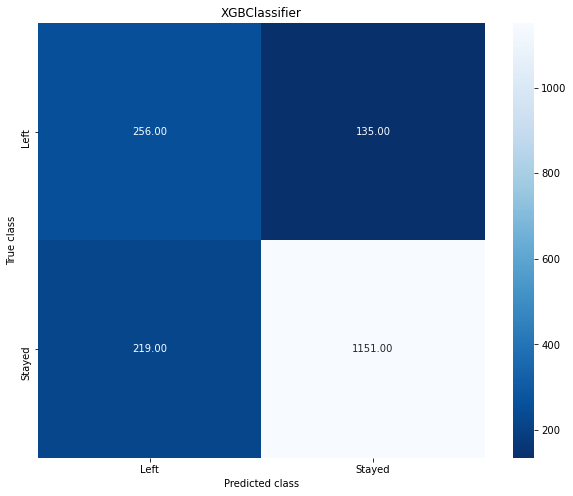

In [131]:
# Finding classification report
print(classification_report(y_test, y_pred))

# finding confusion matrix
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('XGBClassifier')

#### By using Grid Search CV I improve the Accuracy Score : 80%.

#### After modelling Decision Tree Classifier then my next step is to find Auc Score which will help me to make Roc_Auc Curve.
#### Below is the Auc Score:

In [132]:
# XGBClassifier 
roc_auc_score(y_test,xgb.predict(x_test))

0.7169853482851765

#### So, I get Auc Score From Decision Tree Classifier is 71.69%

## AdaBoostClassifier

In [133]:
ada = AdaBoostClassifier()

In [134]:
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

In [135]:
#accuracy_score before tuning
print(accuracy_score(y_test,y_pred))

0.7984099943214082


### Hyperparameter tuning for AdaBoost using GridSearchCV 

In [136]:
params = {'n_estimators':[40,42,44,45],'learning_rate':[0.20,0.22,0.234567]}

In [137]:
grd_ada = GridSearchCV(AdaBoostClassifier(),param_grid = params)

In [138]:
grd_ada.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.22, 0.234567],
                         'n_estimators': [40, 42, 44, 45]})

In [139]:
grd_ada.best_estimator_

AdaBoostClassifier(learning_rate=0.22, n_estimators=45)

In [140]:
ada = AdaBoostClassifier(learning_rate = 0.2434567,n_estimators = 44)

In [141]:
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

In [142]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1181,  105],
       [ 246,  229]], dtype=int64)

In [143]:
ada.score(x_test,y_test)

0.8006814310051107

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1286
           1       0.69      0.48      0.57       475

    accuracy                           0.80      1761
   macro avg       0.76      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



Text(0.5, 1.0, 'AdaBoostClassifier')

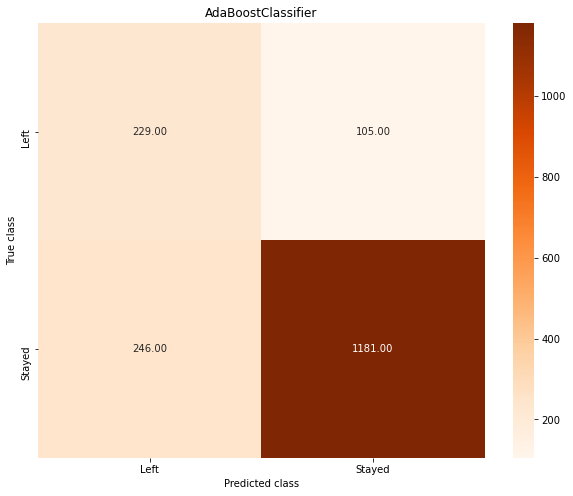

In [144]:
# Finding classification report
print(classification_report(y_test, y_pred))

# finding confusion matrix
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = "Oranges")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('AdaBoostClassifier')

#### By using Grid Search CV I improve the Accuracy Score : 80%.
#### After modelling AdaBoostClassifier then my next step is to find Auc Score which will help me to make Roc_Auc Curve.
#### Below is the Auc Score:

In [145]:
# AdaBoostClassifier 
roc_auc_score(y_test,ada.predict(x_test))

0.7002283703036752

#### So, I get Auc Score From Decision Tree Classifier is 70.02%

## Roc Curve

#### In Machine Learning, performance measurement is an essential task.
#### So when it comes to a classification problem, I can count on an AUC - ROC Curve.
#### It is one of the most important evaluation metrics for checking any classification model’s performance. 
#### It is also written as AUROC (Area Under the Receiver Operating Characteristics)

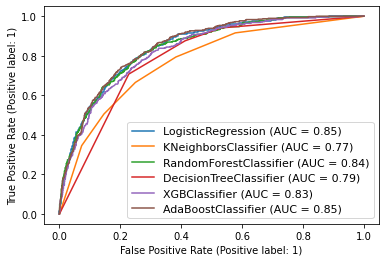

In [404]:
disp = plot_roc_curve(log_reg,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

### Summary

#### ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.¶
#### ROC curves are appropriate when the observations are balanced or not.
#### According to my Roc_Auc Curve I can say that RandomForestClassifier with 90% is the best predictive model in this Dataset.

### Saving the Best Model

In [29]:
import pickle

In [59]:
# saving the Logistic Regression Model

filename = 'finalized_model.pickle'
pickle.dump(log_reg,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

In [153]:
from IPython.display import Image
Image(url= "https://www.askpython.com/wp-content/uploads/2020/11/LOGISTIC-REGRESSION.png")

#### Saving Logistic Regression Model as it accuracy score is 80% and Roc_Auc Curve value is 85%.

## Conclusion

### In the modeling Building section, I have seen the hyperparameter tuned Logistic Regression has the highest Best Score (0.80).
### It can be clearly seen the feature engineering effects on each individual six model in 'Comparison of ML Classifiers with Effects of Future Engineering' Roc Curve chart above.

### I’ll briefly discuss how I approached this problem of predicting Churn.
#### a) I have Churn datastet from which I had to extract information.

#### b ) I had used pandas library to read the Dataset which provide me to explore & viualize the Data properly based on Rows & Columns.

#### c) After from all datasets, I preprocessed the data using replacing all zeros.

#### d) I did exploratory data analysis on main data frame and tried to see all visualizations.

#### e) Based on visulization knowledge, I use various EDA TECHNIQUES to plot the graphs and Box Plot.

#### f) I use VIF and Standard Scalar to scaled the data and by VIF I make a relationship between Features & Features.

#### g) After from all these i split the Features & Labels into 2 parts.

#### h) On this data, I have applied our machine learning models such as logistic regression, Random forest,KNN,XGBClassifier,Decision Tree Classifier and AdaBoostClassifier.

#### i) After which I found Logistic Regression has the High accuracy score(80%) and best amng all the models.

#### j)Based on the model scores, to predict customer churn Logistic Regression seems to be the best model for this dataset.